## Machine Learning Exercise 1.

* 3조: 전은선, 이종민, 최원상

In [1]:
import numpy as np

%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score

In [2]:
# Import IRIS dataset
iris = datasets.load_iris()

### task1: very simple data analysis
* 아래에 슬라이드에 제시된 scatter plot를 구현하세요

C:\jm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\jm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\jm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\jm\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


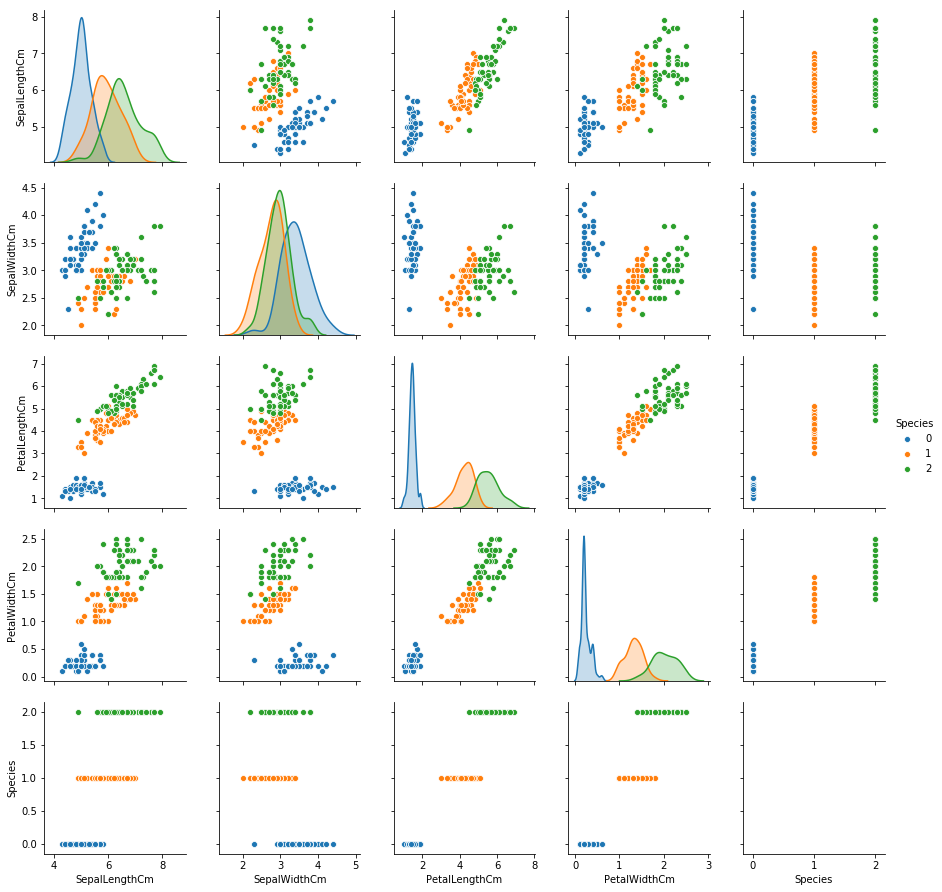

In [3]:
import pandas as pd
import seaborn as sns

df_iris = pd.DataFrame({'SepalLengthCm':iris.data[:,0],'SepalWidthCm':iris.data[:,1],'PetalLengthCm':iris.data[:,2],'PetalWidthCm':iris.data[:,3],'Species':iris.target})
sns.pairplot(data=df_iris, hue='Species')

### task2: bias-variance tradeoff
 * 아래 코드의 n_neighbor를 수정했을 때의 변화를 나타내고 tradeoff 관점에서 기술하세요.

In [4]:
def iris_knn(k):
    n_neighbors = k

    # we only take the first two features. We could avoid this ugly
    # slicing by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target
    
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors))

    plt.show()

* k 값이 작을 수록 bias 가 작아지고 variance 증가 (training data 에만 대한 적합한 모델을 만들기 때문에 over fit)
* k 값이 클 수록 bias 가 커지고 variance 감소 (under fit)

* [결론] k의 적정값을 구하는 것이 중요!

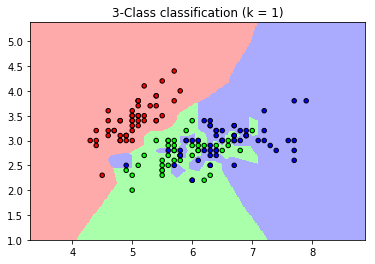

In [5]:
iris_knn(1)

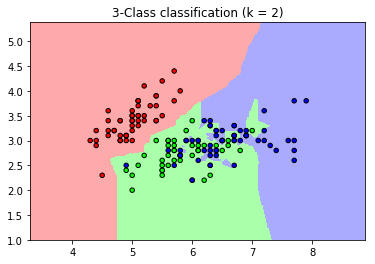

In [6]:
iris_knn(2)

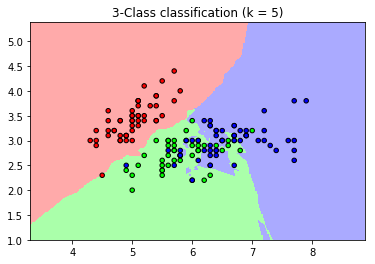

In [7]:
iris_knn(5)

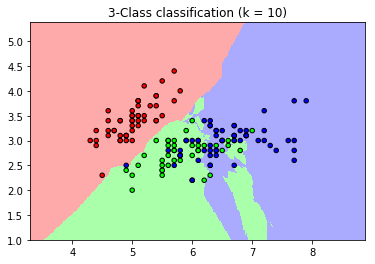

In [8]:
iris_knn(10)

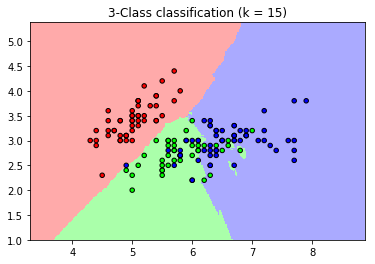

In [9]:
iris_knn(15)

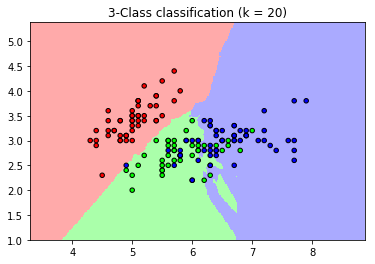

In [10]:
iris_knn(20)

### task 3: training-test set split
* 슬라이드에 제시한 그림을 구현하세요

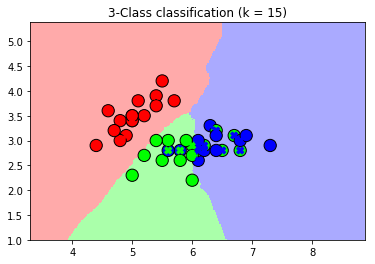

In [31]:
from sklearn.model_selection import train_test_split

n_neighbors = 15

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='o' ,cmap=cmap_bold, edgecolor='k', s=150)
plt.scatter(x_test[:, 0], x_test[:, 1], c=clf.predict(x_test), marker='X' ,cmap=cmap_bold,  s=50)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()

### task 4: overfitting
 * 슬라이드에서 제시한 plot를 구현하고 이 현상을 설명하세요

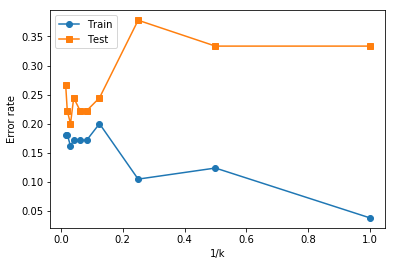

In [37]:
neighbors_settings = [64,48,32,24,16,12,8,4,2,1]
neighbors_settings2 = [1/k for k in neighbors_settings] 
#print(neighbors_settings2)
training_score = []
test_score = []

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

for n_neighbors in neighbors_settings:
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(x_train, y_train)
    
    train_s=1-clf.score(x_train,y_train)
    test_s=1-clf.score(x_test,y_test)
    
    training_score.append(train_s)
    test_score.append(test_s)

plt.plot(neighbors_settings2, training_score, label="Train", marker='o')
plt.plot(neighbors_settings2, test_score, label="Test", marker='s')
plt.ylabel("Error rate")
plt.xlabel("1/k")
plt.legend()

plt.show()

* k 작아질수록 Train Error rate 는 작아지고, Test Error rate 는 증가한다. (k가 작으면 over fit 되기 때문에)
* 적정값은 Train, Test Error rate 를 보았을 때 k=12 정도부터 적절해 보임